# Problem Statement

BigMart aims to optimize its sales strategy by leveraging predictive modeling 
on the collected 2013 sales data for 1559 products across 10 stores in different cities. 
The goal is to develop a robust predictive model that accurately forecasts the sales of each product at a specific store. 
Through this model, BigMart intends to gain insights into the key properties of products and stores that significantly 
influence sales performance.

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
test = pd.read_csv(r'C:\Users\user\Downloads\Technocolab Software\test.csv')
train = pd.read_csv(r'C:\Users\user\Downloads\Technocolab Software\train.csv')

In [3]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
train.shape

(8523, 12)

In [9]:
test.shape

(5681, 11)

In [10]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


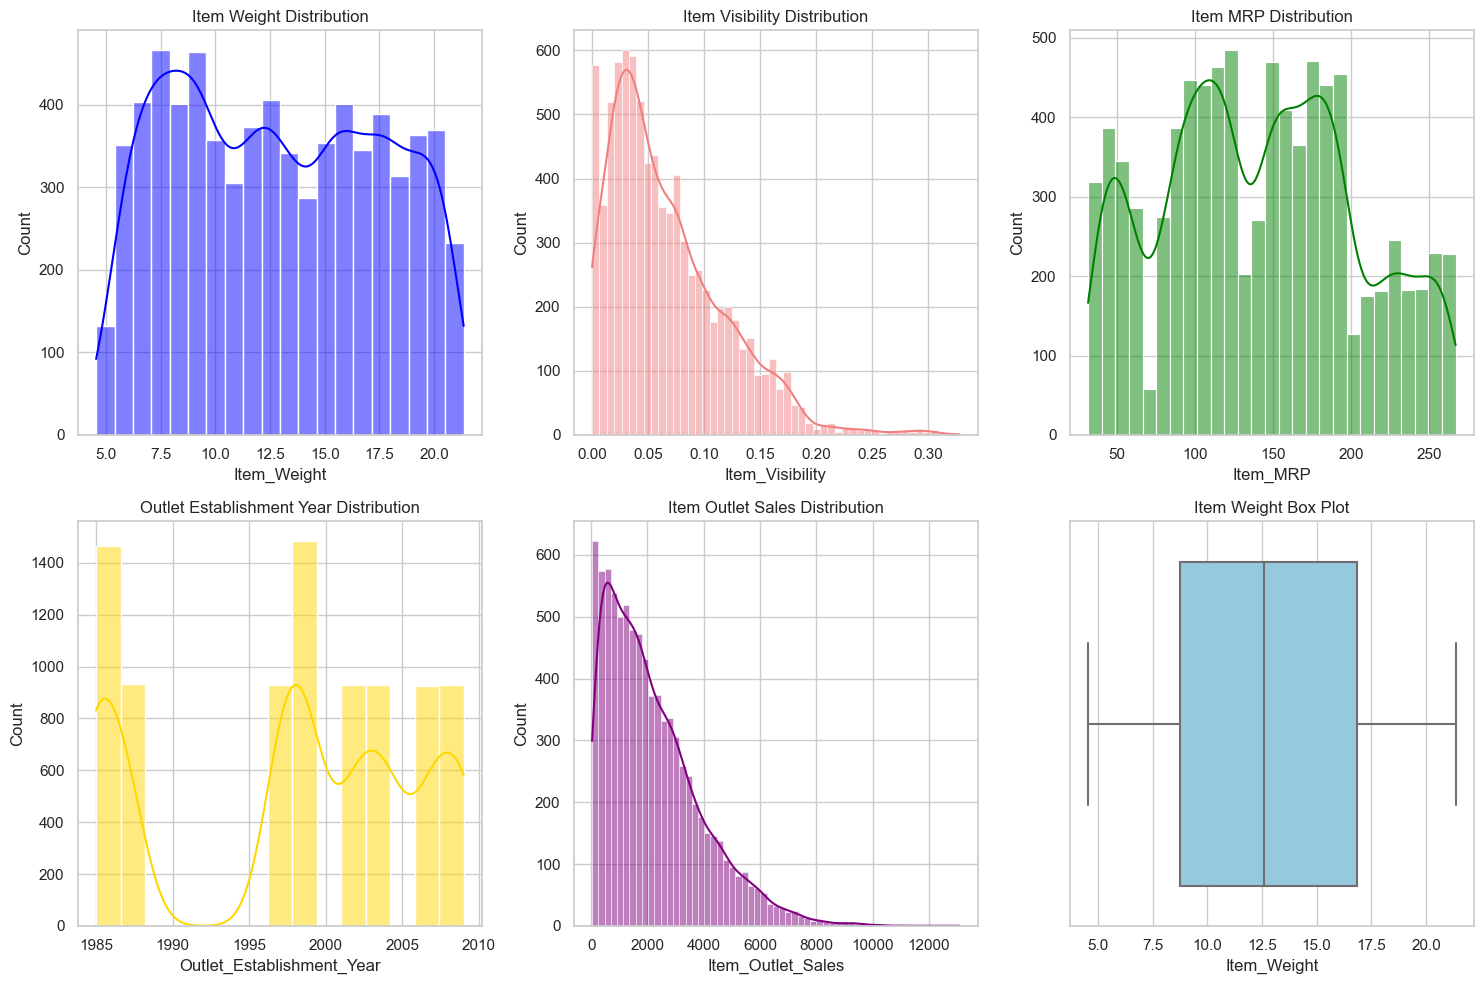

In [12]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot histograms for numerical features
sns.histplot(train['Item_Weight'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Item Weight Distribution')

sns.histplot(train['Item_Visibility'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Item Visibility Distribution')

sns.histplot(train['Item_MRP'], kde=True, ax=axes[0, 2], color='green')
axes[0, 2].set_title('Item MRP Distribution')

sns.histplot(train['Outlet_Establishment_Year'], kde=True, ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Outlet Establishment Year Distribution')

sns.histplot(train['Item_Outlet_Sales'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Item Outlet Sales Distribution')

# Box plots to identify outliers
sns.boxplot(x=train['Item_Weight'], ax=axes[1, 2], color='skyblue')
axes[1, 2].set_title('Item Weight Box Plot')

plt.tight_layout()
plt.show()


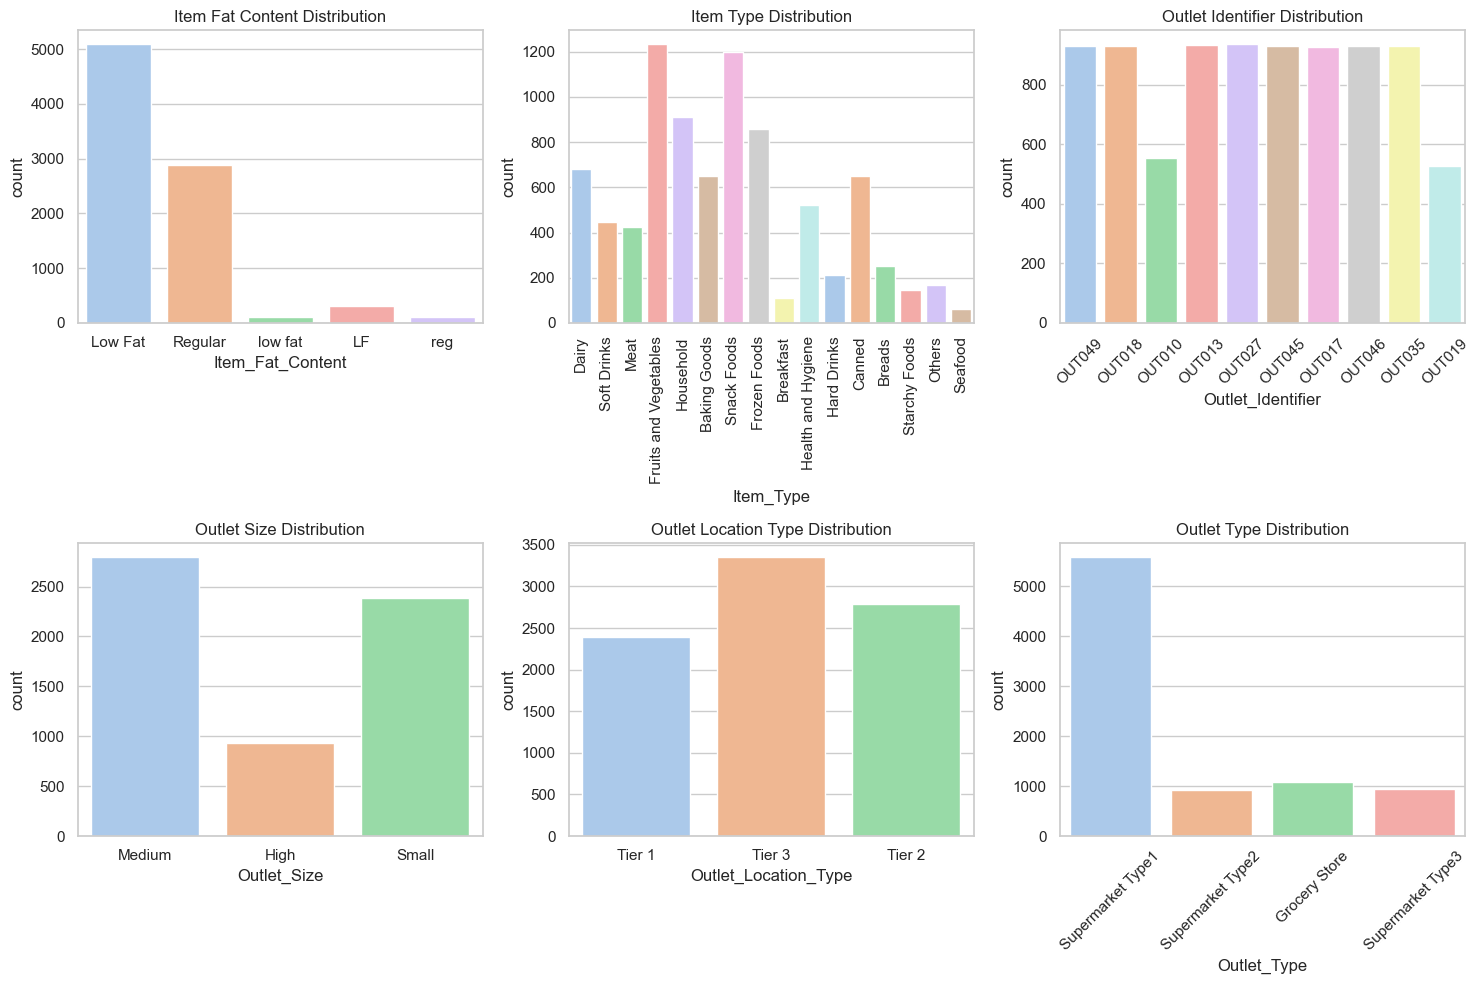

In [13]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot count plots for categorical features
sns.countplot(x='Item_Fat_Content', data=train, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Item Fat Content Distribution')

sns.countplot(x='Item_Type', data=train, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Item Type Distribution')
axes[0, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better visibility

sns.countplot(x='Outlet_Identifier', data=train, ax=axes[0, 2], palette='pastel')
axes[0, 2].set_title('Outlet Identifier Distribution')
axes[0, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

sns.countplot(x='Outlet_Size', data=train, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Outlet Size Distribution')

sns.countplot(x='Outlet_Location_Type', data=train, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Outlet Location Type Distribution')

sns.countplot(x='Outlet_Type', data=train, ax=axes[1, 2], palette='pastel')
axes[1, 2].set_title('Outlet Type Distribution')
axes[1, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

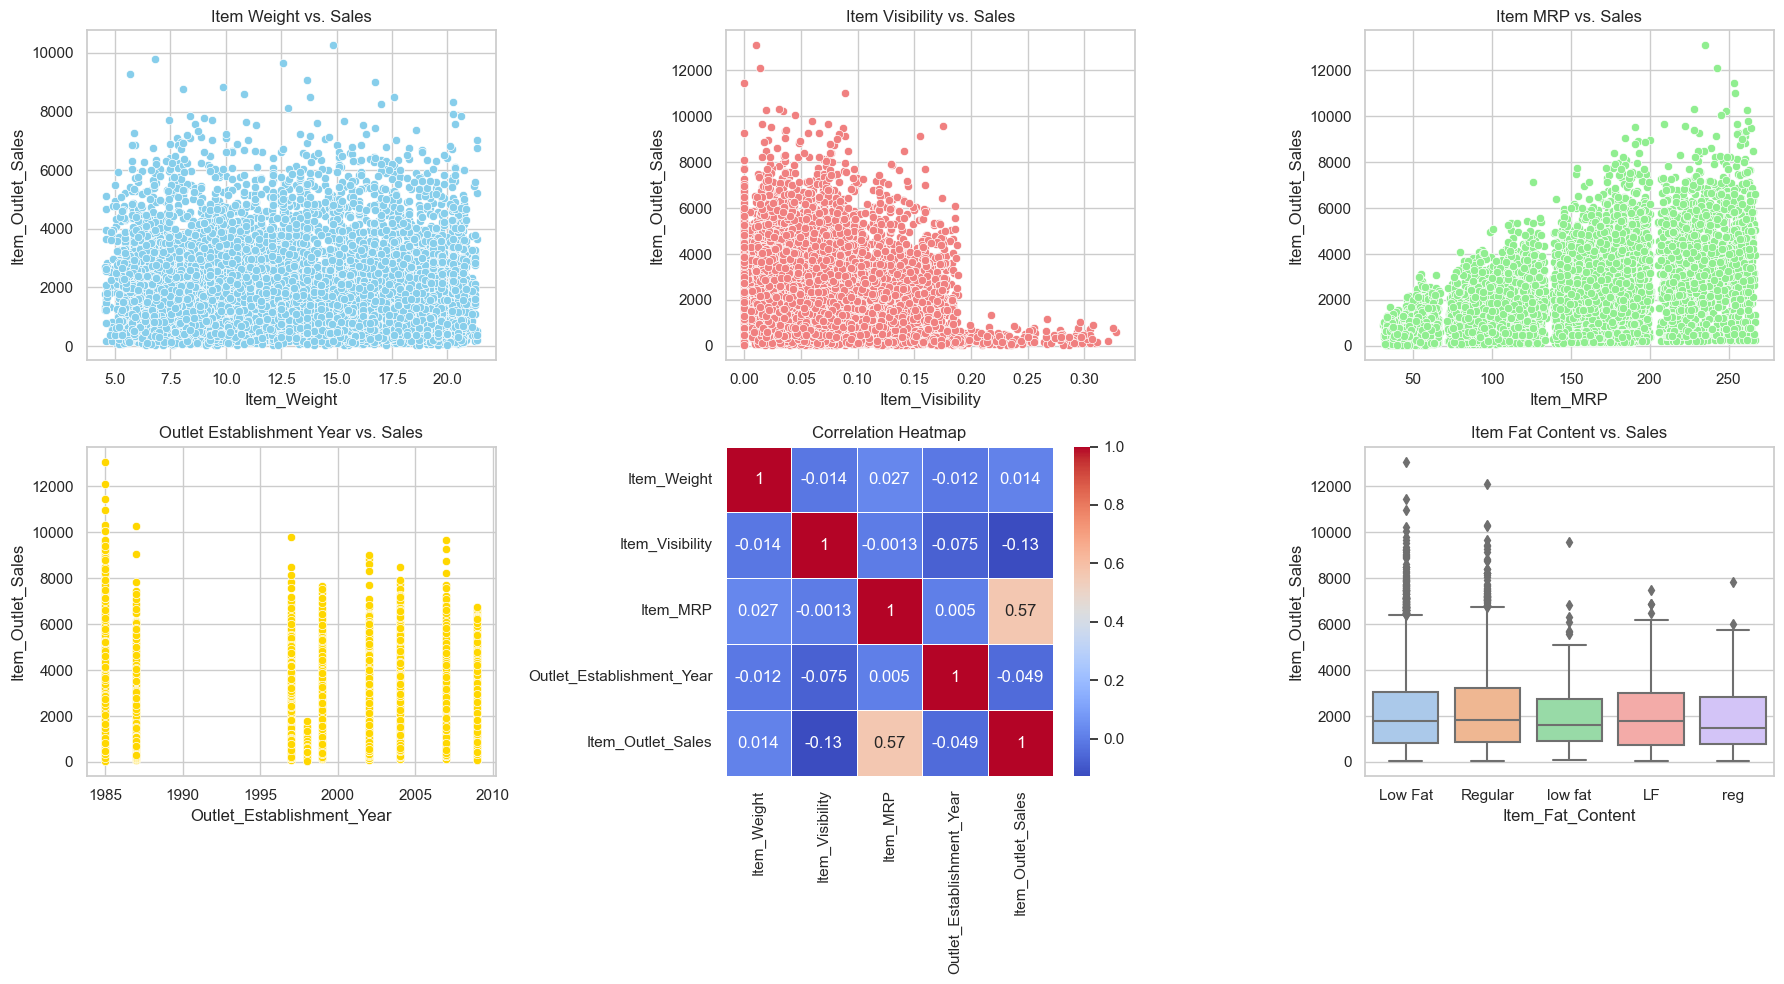

In [14]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Scatter plots for numerical features vs. Item_Outlet_Sales
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=train, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Item Weight vs. Sales')

sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Item Visibility vs. Sales')

sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train, ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Item MRP vs. Sales')

sns.scatterplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train, ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Outlet Establishment Year vs. Sales')

# Correlation heatmap
correlation_matrix = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

# Box plots for categorical features vs. Item_Outlet_Sales
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train, ax=axes[1, 2], palette='pastel')
axes[1, 2].set_title('Item Fat Content vs. Sales')

plt.tight_layout()
plt.show()

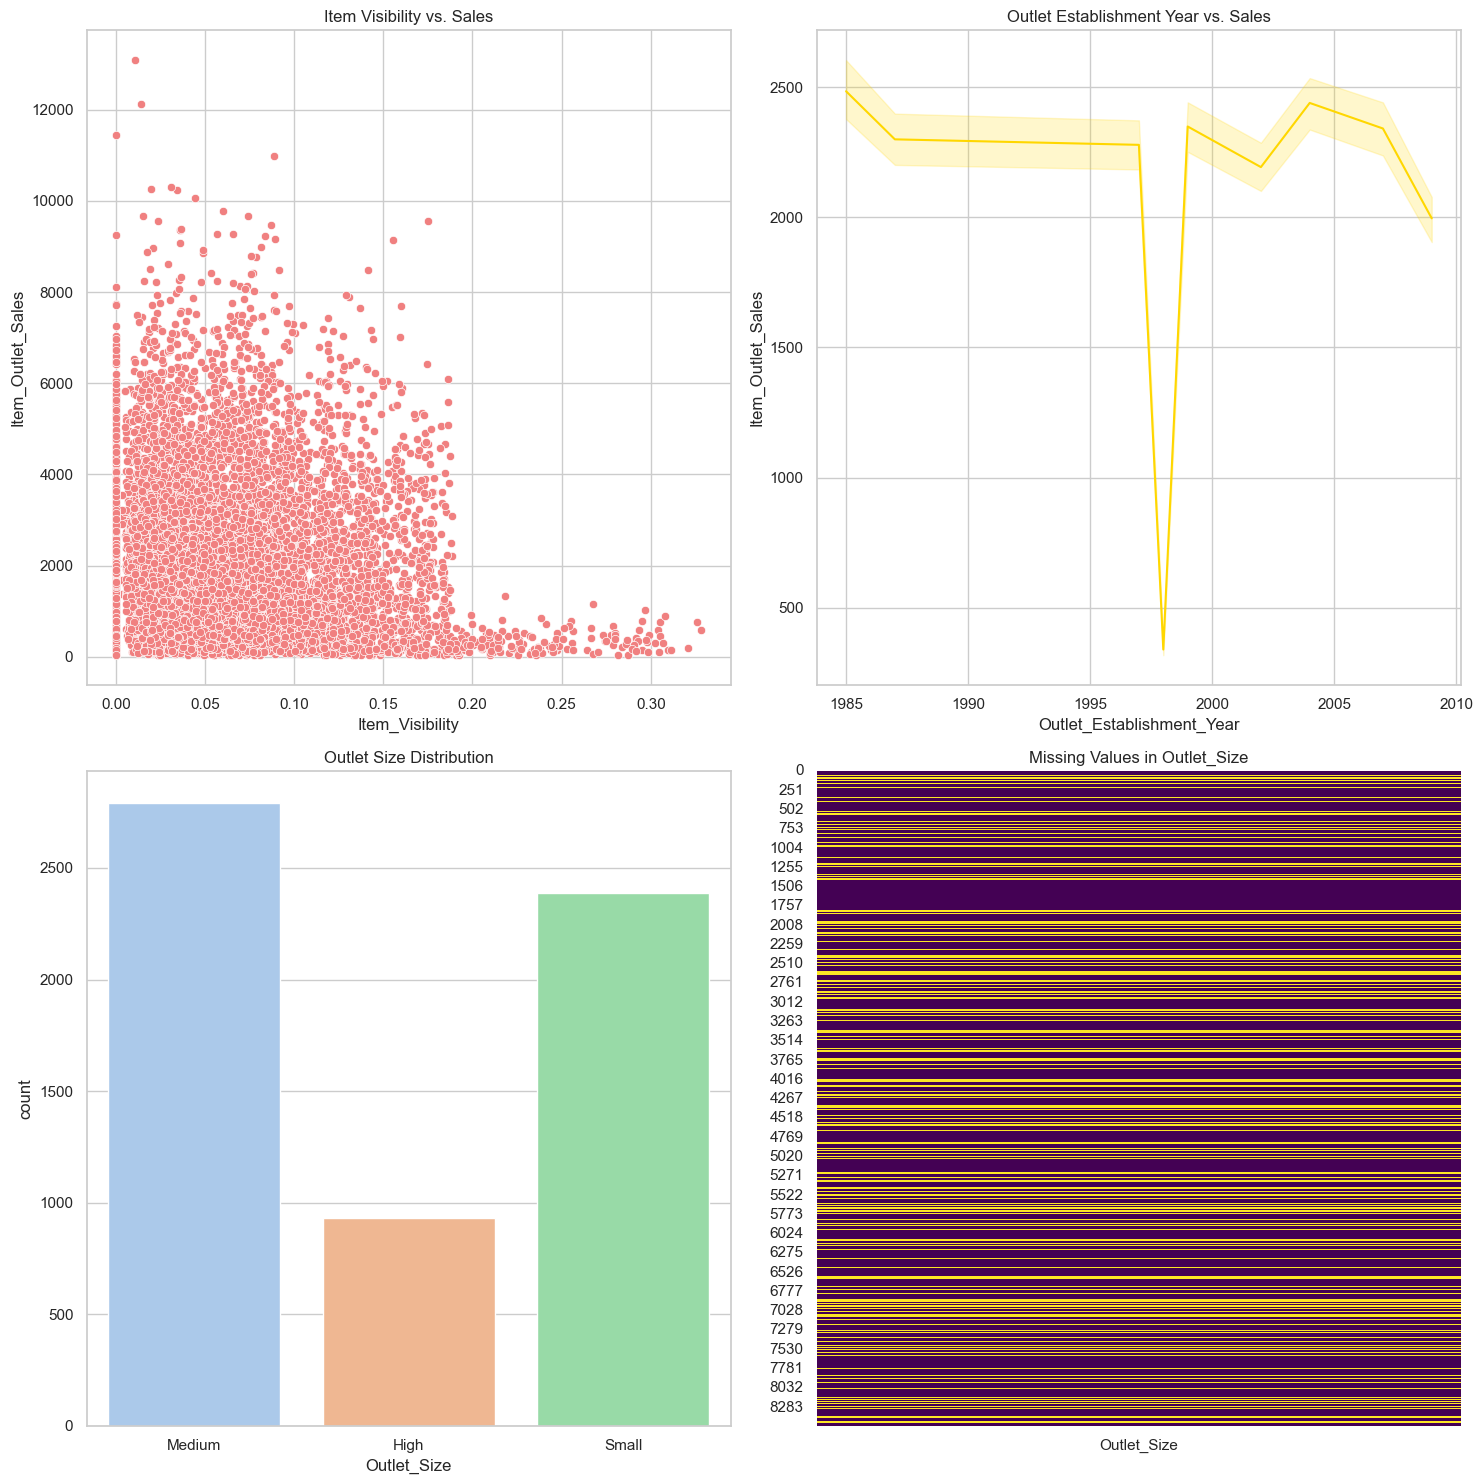

In [15]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Item_Visibility vs. Item_Outlet_Sales - Scatter Plot
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train, ax=axes[0, 0], color='lightcoral')
axes[0, 0].set_title('Item Visibility vs. Sales')

# Outlet_Establishment_Year vs. Item_Outlet_Sales - Line Plot
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train, ax=axes[0, 1], color='gold')
axes[0, 1].set_title('Outlet Establishment Year vs. Sales')

# Outlet_Size - Bar Plot
sns.countplot(x='Outlet_Size', data=train, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Outlet Size Distribution')

# Displaying missing values for Outlet_Size
sns.heatmap(train[['Outlet_Size']].isnull(), cbar=False, cmap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Missing Values in Outlet_Size')

plt.tight_layout()
plt.show()

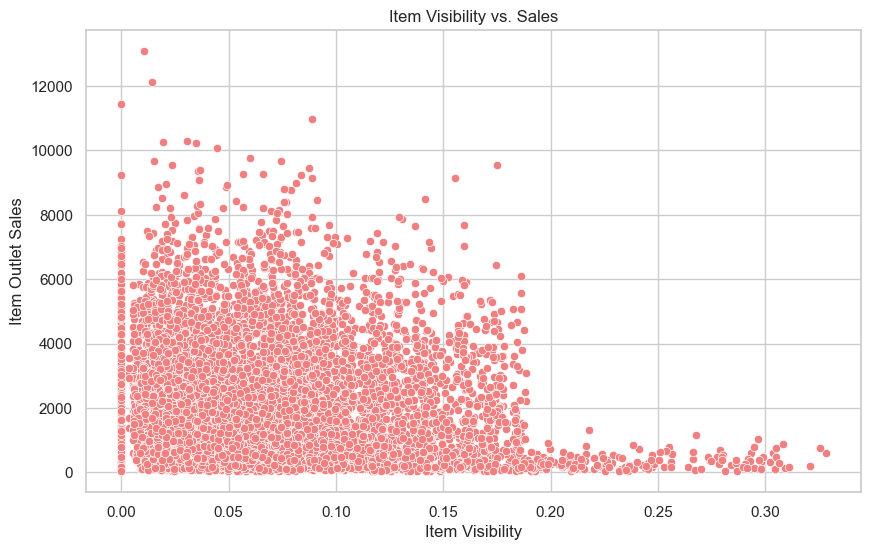

In [16]:
# Scatter Plot: Item_Visibility vs. Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train, color='lightcoral')
plt.title('Item Visibility vs. Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

# Univariate Analysis for Numerical Features:

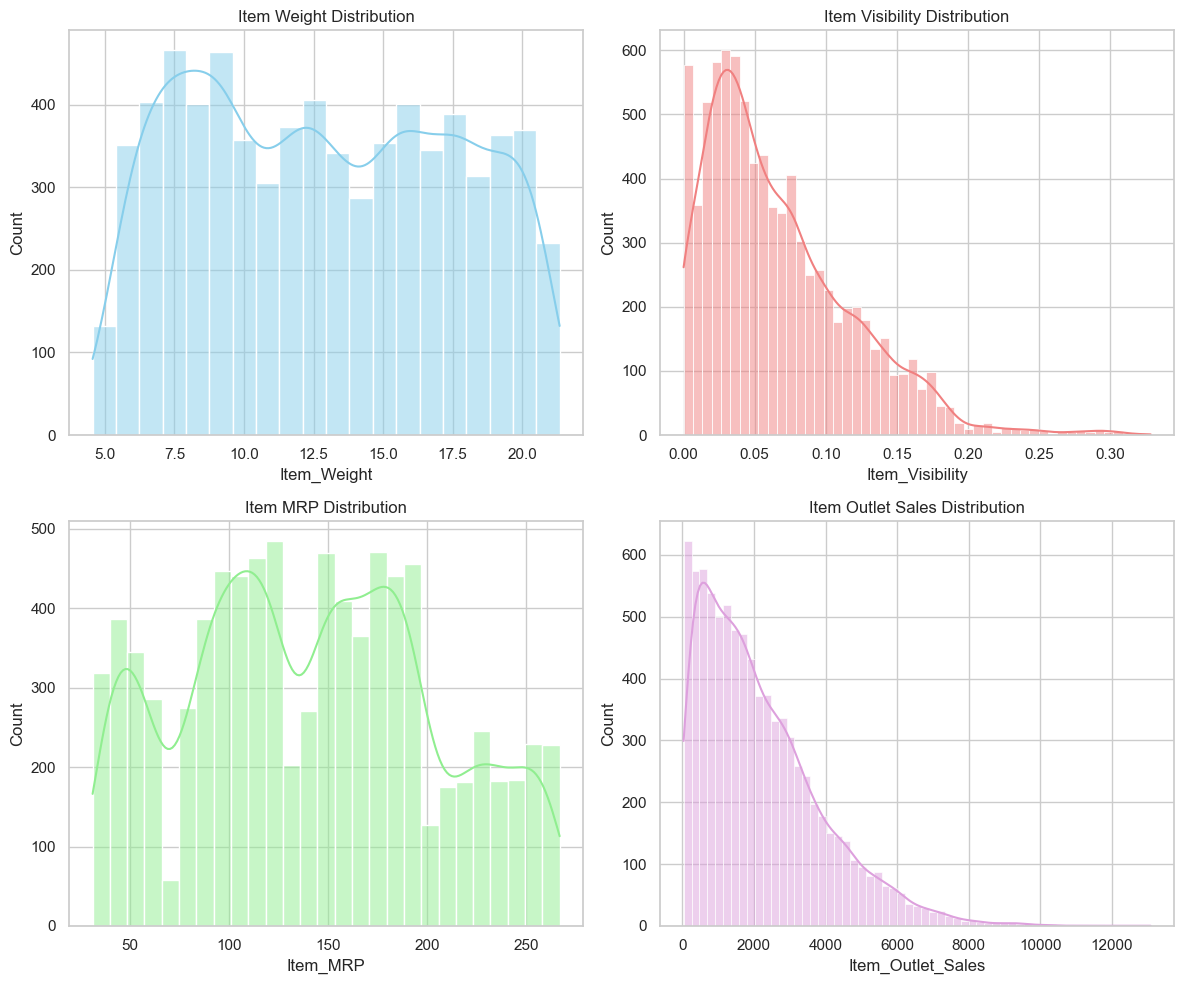

In [17]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.histplot(train['Item_Weight'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Item Weight Distribution')

sns.histplot(train['Item_Visibility'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Item Visibility Distribution')

sns.histplot(train['Item_MRP'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Item MRP Distribution')

sns.histplot(train['Item_Outlet_Sales'], kde=True, ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Item Outlet Sales Distribution')

plt.tight_layout()
plt.show()


# Univariate Analysis for Categorical Features:

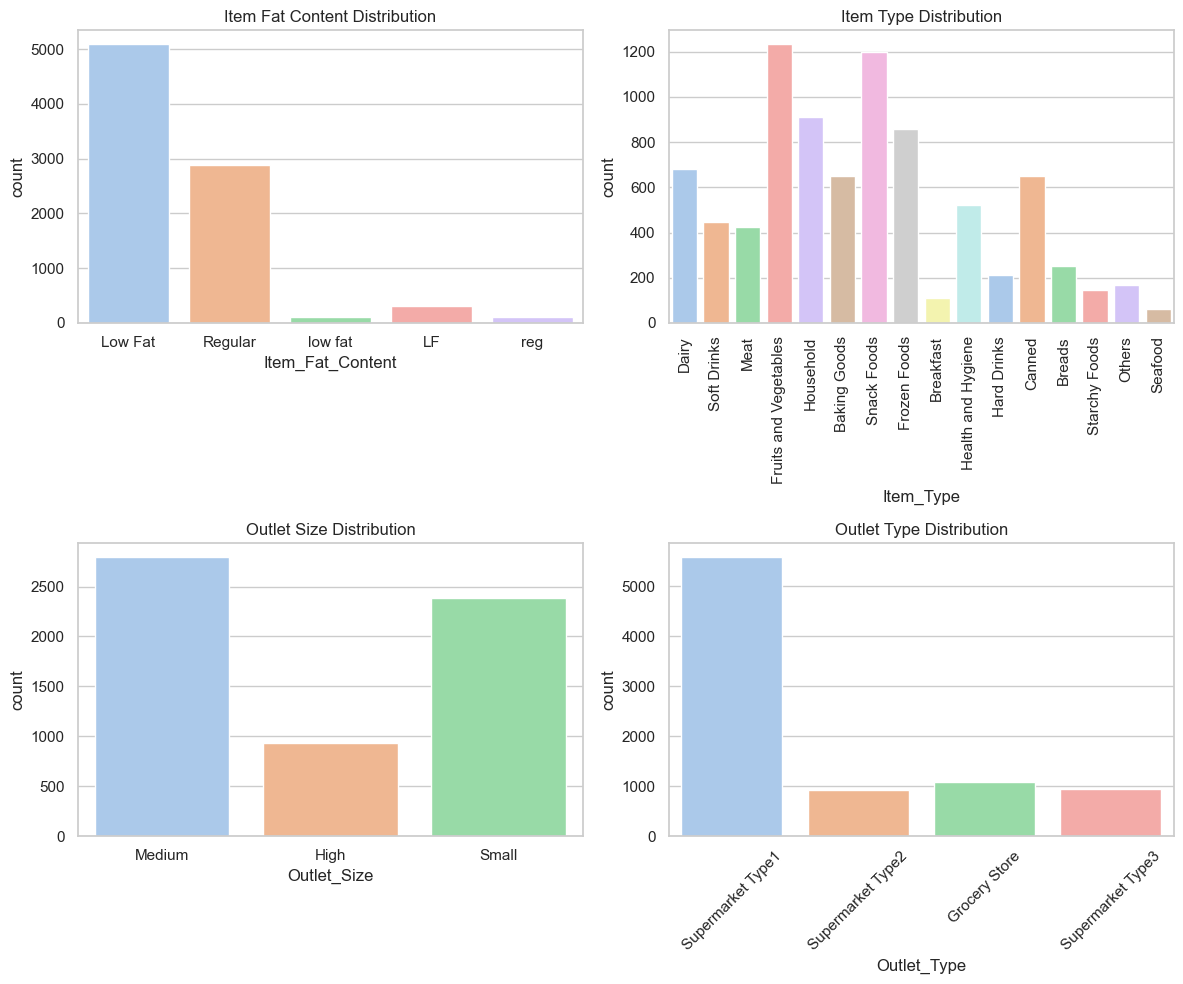

In [18]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Count plots for categorical features
sns.countplot(x='Item_Fat_Content', data=train, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Item Fat Content Distribution')

sns.countplot(x='Item_Type', data=train, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Item Type Distribution')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.countplot(x='Outlet_Size', data=train, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Outlet Size Distribution')

sns.countplot(x='Outlet_Type', data=train, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Outlet Type Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Apply Imputation on train data

In [19]:
print("Columns with Missing Values Before Imputation:")
print(train.isnull().sum())

numerical_features = train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = train.select_dtypes(include=['object']).columns


# Impute missing values with KNN for numerical features
knn_imputer_numerical = KNNImputer(n_neighbors=5)
train[numerical_features] = knn_imputer_numerical.fit_transform(train[numerical_features])

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
for feature in categorical_features:
    train[feature] = label_encoder.fit_transform(train[feature].astype(str))

# Impute missing values with KNN for categorical features
knn_imputer_categorical = KNNImputer(n_neighbors=5)
train[categorical_features] = knn_imputer_categorical.fit_transform(train[categorical_features])

# Display the columns with missing values after imputation
print("\nColumns with Missing Values After Imputation:")
print(train.isnull().sum())

Columns with Missing Values Before Imputation:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Columns with Missing Values After Imputation:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [20]:
# Standard Scaling
scaler = StandardScaler()
train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = scaler.fit_transform(train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])


In [21]:
#Feature Engineering
# Example: Creating a new feature 'Outlet_Age'
train['Outlet_Age'] = 2023 - train['Outlet_Establishment_Year']

In [22]:
# Example: Dropping 'Item_Identifier' as it might not be relevant for prediction
train = train.drop('Item_Identifier', axis=1)

In [23]:
X=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']

In [24]:
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    # Replace outliers with median value
    median_value = data[column].median()
    data.loc[outliers, column] = median_value
    
    return data

# Specify numerical columns where you want to handle outliers
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Loop through numerical columns and handle outliers using IQR
for column in numerical_columns:
    train = handle_outliers_iqr(train, column)

# Display the dataset after handling outliers
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,-0.820955,1.0,-0.970732,4.0,1.747454,9.0,0.139541,1.0,0.0,1.0,3735.1380,2022.860459
1,-1.604462,2.0,-0.908111,14.0,-1.489023,3.0,1.334103,1.0,2.0,2.0,443.4228,2021.665897
2,1.079863,1.0,-0.956917,10.0,0.010040,9.0,0.139541,1.0,0.0,1.0,2097.2700,2022.860459
3,1.473935,2.0,-1.281758,6.0,0.660050,0.0,0.020085,3.0,2.0,0.0,732.3800,2022.979915
4,-0.906723,1.0,-1.281758,9.0,-1.399220,1.0,-1.293934,0.0,2.0,1.0,994.7052,2024.293934


In [41]:
# Assuming 'df' is your preprocessed DataFrame
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 1134180.6446276847
R2 Score: 0.4705401484190521


In [42]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R2 Score: {rf_r2}')


Random Forest Mean Squared Error: 1016726.408746488
Random Forest R2 Score: 0.5253703049657865


In [43]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f'XGBoost Mean Squared Error: {xgb_mse}')
print(f'XGBoost R2 Score: {xgb_r2}')


XGBoost Mean Squared Error: 1062121.4148181381
XGBoost R2 Score: 0.5041789424689402
